In [1]:
import pandas as pd
import numpy as np

In [38]:
pieces = []
for year in range(1880, 2024):
    frame = pd.read_csv(f'data/BabyNames/yob{year}.txt', names=['name', 'sex', 'count'])

    frame['year'] = year
    pieces.append(frame)

names = pd.concat(pieces, ignore_index=True)

C:\Users\wills\AppData\Local\Temp\ipykernel_25560\2380112394.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  names_group = names.groupby(["year", "sex"]).apply(add_prop).drop(['year', 'sex'], axis=1)


name  count      prop
year sex                         
2023 M      Liam  20802  0.012228
     M      Noah  18995  0.011165
     M    Oliver  14741  0.008665
     M     James  11670  0.006860
     M    Elijah  11452  0.006732
...          ...    ...       ...
1880 F       Ula      5  0.000055
     F    Vannie      5  0.000055
     F    Verona      5  0.000055
     F    Vertie      5  0.000055
     F     Wilma      5  0.000055

[2117219 rows x 3 columns]

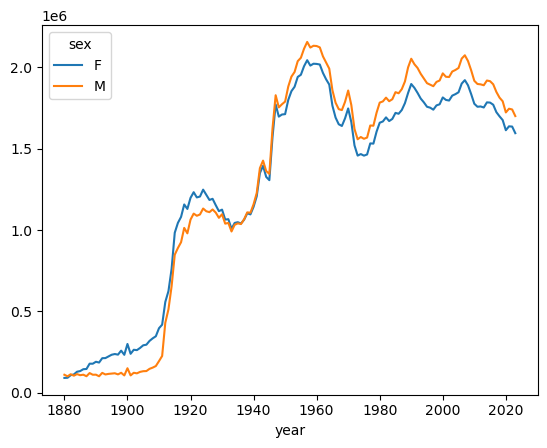

In [ ]:
names.pivot_table('count', 'year', 'sex', 'sum').plot()

def add_prop(group):
    group["prop"] = group["count"] / group["count"].sum()
    return group

names_group = names.groupby(["year", "sex"]).apply(add_prop).drop(['year', 'sex'], axis=1)
names_group.reset_index(level=2, drop=True).sort_index(level=0, ascending=False)